This is a data science project that explores trends in missing persons cases. The data was acquired from Kaggle and NamUs.

In [ ]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder

missing = pd.read_csv('missing_illinois.csv')

missing.drop(labels='Case Number', axis=1, inplace=True)

missing.drop(labels='Last Name', axis=1, inplace=True)

missing.drop(labels='First Name', axis=1, inplace=True)

missing.drop(labels='State', axis=1, inplace=True)

missing['Missing Age'] = missing['Missing Age'].str.replace(r'\D', '', regex=True).astype(float).astype(int)

missing['Sex'] = missing['Sex'].replace({'Male': 0, 'Female': 1})

# Create an instance of LabelEncoder

label_encoder = LabelEncoder()

missing['County'] = label_encoder.fit_transform(missing['County'].fillna('Unknown'))

missing['Race / Ethnicity'] = label_encoder.fit_transform(missing['Race / Ethnicity'].fillna('Unknown'))

missing['City'] = label_encoder.fit_transform(missing['City'].fillna('Unknown'))

missing['Date Modified'] = missing['Date Modified'].str.replace('/', '')

missing['DLC'] = missing['DLC'].str.replace('/', '')

missing


In [11]:
from sklearn.preprocessing import StandardScaler

missing_copy = missing.copy()

# Create an instance of the scaler
scaler = StandardScaler()

# Select the columns to scale
columns_to_scale = ['DLC', 'Missing Age','City','County','Sex', 'Race / Ethnicity','Date Modified']

# Scale the selected columns in the copy of the DataFrame
missing_copy[columns_to_scale] = scaler.fit_transform(missing_copy[columns_to_scale])

missing_copy

,DLC,Missing Age,City,County,Sex,Race / Ethnicity,Date Modified
0,-0.939548,-0.062693,-0.301749,1.712137,-0.875190,0.674612,-0.867752
1,-0.942423,-0.729809,1.875913,0.551229,-0.875190,0.674612,-1.079220
2,-1.252929,0.665070,0.880410,0.001325,-0.875190,0.674612,-0.849014
3,-1.252929,0.058601,0.880410,0.001325,1.142609,0.674612,-0.849014
4,-1.252929,-0.365927,-0.239530,-0.731880,-0.875190,0.674612,-1.124726
...,...,...,...,...,...,...,...
410,0.198956,-1.033044,-0.737282,-0.731880,1.142609,0.674612,1.043494
411,-0.128801,-0.487221,-0.737282,-0.731880,1.142609,0.674612,-0.008495
412,0.802715,0.847011,0.320440,2.078740,1.142609,0.674612,0.202974
413,1.328849,1.332187,1.772215,-0.304177,-0.875190,0.674612,-1.397762


## Question 1 ## 
Does city and demographic information serve as a proxy for race in this dataset?

# Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

# Select the feature columns
feature_cols = ['Missing Age','City','County','Sex']

# Select the features and target from the dataframe
X = missing_copy[feature_cols]
y = missing_copy['Race / Ethnicity']

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Calculate the coefficient of determination (R-squared)
r_squared = model.score(X, y)
print("R-squared:", r_squared)

R-squared: 0.05792862454658976


### Analysis

An R-squared value of approximately .0579 is low. It tells me that around 5.79% of the variance in the target variable Race/Ethicity can be explained by the featured variables (Missing Age, City, County, and Sex). In other words, the model has a relatively low ability to predict/explain the variation in the race/ethnicity of the missing persons in this dataset. The variation is likely influenced by other variables not included in my data. These results suggest that city and demographic information do not serve as a strong proxy for race in this dataset, as linear regression is not a good algorithm for this data.

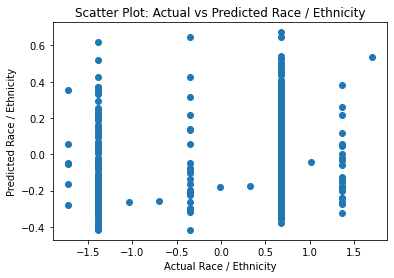

In [13]:
import matplotlib.pyplot as plt

# Predict the target variable
y_pred = model.predict(X)

# Create a scatter plot
plt.scatter(y, y_pred)
plt.xlabel('Actual Race / Ethnicity')
plt.ylabel('Predicted Race / Ethnicity')
plt.title('Scatter Plot: Actual vs Predicted Race / Ethnicity')
plt.show()

### Analysis
In this scatterplot, there are only a few cases where the values of the Actual Race/Ethicity match the values of the predicted Race/Ethnicity. This representation aligns with the analysis of my R-Squared score in the above section. The scatterplot provides a visual representation that shows the loose relationship between the x-variables (city and demographics) and the y (predicted) variable race/ethnicity.

 ### Decision Tree ###

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Feature vector X
features = ['Missing Age', 'City', 'County', 'Sex']
# Label y
target = 'Race / Ethnicity'

# Select the features and target from the dataframe
X = missing_copy[features]
y = missing[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create decision tree classifier
classify = DecisionTreeClassifier()

# Fit the model to the training data
classify.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classify.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score: {:.2f}".format(accuracy))

Confusion matrix:
[[ 0  1  0  0  0  1  0]
 [ 0 11  0  1  0  7  3]
 [ 0  0  0  0  0  0  0]
 [ 1  3  0  2  0  2  0]
 [ 0  1  0  0  0  0  0]
 [ 1 10  1  3  0 28  1]
 [ 0  1  0  1  0  4  0]]
Accuracy score: 0.49


### Analysis
Based on these results, it seems that the decision tree model has some limitations in accurately predicting race/ethnicity based on the given features. The misclassifications and the low accuracy score suggest that these features alone may not serve as a reliable proxy for determining race/ethnicity in the dataset. Although the decision tree algorithm better connected the city and demographic information to race/ethnicity than the linear regression model. Additional variables or more complex models may still be required to improve the predictive performance.

# KNN

Accuracy when k = 5 : 0.5783132530120482
Accuracy when k = 11 : 0.5783132530120482


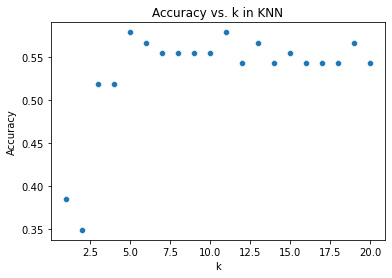

In [15]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

feature_cols = ['Missing Age', 'City', 'County', 'Sex']

# Select the features and target
X = missing_copy[feature_cols]
y = missing['Race / Ethnicity']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_values = range(1, 21)  # Range of k values to try
accuracy_scores = []

# Perform multiple trials with different values of k
for k in k_values:
    # Create and fit the K-nearest neighbors classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict the labels for the test set
    y_pred = knn.predict(X_test)

    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Print the accuracy score when k is 5 or 11
    if k == 5 or k == 11:
        print("Accuracy when k =", k, ":", accuracy)

# Create a scatterplot of k values vs. accuracy scores
sns.scatterplot(x=k_values, y=accuracy_scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k in KNN')
plt.show()

## Analysis 
Each model I used to answer the question of whether or not city and demographic information serve as a proxy for race in this dataset performed better than the last. We see that the accuracy score is the same when k is 5 or 11. Therefore, 5 and 11 are our best k values to use for this model, resulting in around a 57.83% for the accuracy score. Around 57.83% accuracy is a higher percentage than the last two models. City and demographic information show some evidence of being a proxy for race in this dataset. However, the featured variables are not the only factors responsible for predicting race/ethnicity. 

## Question 2 ##
Can you identify any patterns or clusters within the data (excluding DLC and Date Modified) that could help distinguish characteristics of cold cases?

### K-Means Clustering ###

In [27]:
from datetime import datetime, timedelta

missing['DLC'] = pd.to_datetime(missing['DLC'], format='%m%d%Y')
missing['Date Modified'] = pd.to_datetime(missing['Date Modified'], format='%m%d%Y')

# Get today's date
today = pd.Timestamp(datetime.today().date())

# Calculate the time difference between "Date Modified" and today's date in years
missing_copy['Time Difference'] = (today - missing['Date Modified']).dt.days / 365

# Define the threshold for considering a case as cold (e.g., 2 years)
cold_threshold = 2

# Create the "Case Status" column based on the time difference
missing_copy['Case Status'] = [ 1 if diff >= cold_threshold else 0 for diff in missing_copy['Time Difference']]

# Print the updated DataFrame
print(missing_copy)


          DLC  Missing Age      City    County       Sex  Race / Ethnicity  \
0   -0.939548    -0.062693 -0.301749  1.712137 -0.875190          0.674612   
1   -0.942423    -0.729809  1.875913  0.551229 -0.875190          0.674612   
2   -1.252929     0.665070  0.880410  0.001325 -0.875190          0.674612   
3   -1.252929     0.058601  0.880410  0.001325  1.142609          0.674612   
4   -1.252929    -0.365927 -0.239530 -0.731880 -0.875190          0.674612   
..        ...          ...       ...       ...       ...               ...   
410  0.198956    -1.033044 -0.737282 -0.731880  1.142609          0.674612   
411 -0.128801    -0.487221 -0.737282 -0.731880  1.142609          0.674612   
412  0.802715     0.847011  0.320440  2.078740  1.142609          0.674612   
413  1.328849     1.332187  1.772215 -0.304177 -0.875190          0.674612   
414  1.024091    -0.669162 -0.115093  0.429028 -0.875190          0.674612   

     Date Modified  Time Difference  Case Status  Cluster  
0  

In [28]:
from sklearn.cluster import KMeans

# Select the columns
selected_columns = ['Missing Age','City','County','Sex','Race / Ethnicity']  
# Create a new DataFrame with only the selected columns
selected_data = missing_copy[selected_columns].copy()

# Set the number of clusters and trials
k = 2
n = 10

# Initialize variables to store the best dissimilarity and the corresponding trial
best_dissimilarity = float('inf')
best_trial = None

for trial in range(n):
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(selected_data)

    # Get the cluster labels for each data point
    cluster_labels = kmeans.labels_

    variability = kmeans.inertia_

    # Calculate the dissimilarity (sum of distances between clusters)
    distances = kmeans.transform(selected_data)
    dissimilarity = np.sum(distances.min(axis=1))

    # Get the cluster labels for cold cases
    cold_cases_cluster_labels = cluster_labels[missing_copy['Case Status'] == 1]

    # Check if there are any distinct clusters for cold cases
    distinct_clusters = len(set(cold_cases_cluster_labels))

    # Print the cluster analysis, variability, and dissimilarity for this trial
    print(f"Trial {trial+1} - Cluster Analysis:")
    print(cluster_labels)
    print(f"Variability: {variability}")
    print(f"Dissimilarity: {dissimilarity}")
    print(f"Distinct Clusters for Cold Cases: {distinct_clusters}")
    print()

    # Check if this trial has the best dissimilarity and distinct clusters for cold cases so far
    if dissimilarity < best_dissimilarity and distinct_clusters > 1:
        best_dissimilarity = dissimilarity
        best_trial = trial+1

# Print the best trial
print(f"Best Trial: {best_trial}")

Trial 1 - Cluster Analysis:
[1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0
 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0
 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1
 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0
 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1
 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0
 1 1 0 0 0 1 1 1]
Variability: 1637.379589309211
Dissimilarity: 802.5094724718223
Distinct Clusters for Cold Cases: 2

Trial 2 - Cluster Analysis:


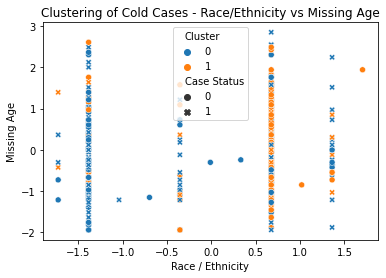

In [29]:
# Select the relevant columns for clustering
data = missing_copy[['Missing Age', 'City', 'County', 'Sex', 'Race / Ethnicity', 'Case Status']]
# Perform K-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame
missing_copy['Cluster'] = cluster_labels

# Create a scatter plot using Seaborn
sns.scatterplot(x='Race / Ethnicity', y='Missing Age', hue='Cluster', style='Case Status', data=missing_copy)

# Set the title for the plot
plt.title('Clustering of Cold Cases - Race/Ethnicity vs Missing Age')

# Show the plot
plt.show()

### Analysis 
I changed from 5 clusters all the way down to 2, because when using 5 clusters, 3 of the clusters had very few data points. Cluster 0 mainly falls into one ethnicity with a few of the points being in other ethnicities. The same is true for cluster 1. However, cluster 0 has more cold cases. This is an interesting finding based on previous knowledge. Some cases are provided more resources than others. 

## Question 3
Can we identify any patterns or clusters within the data that could help distinguish characteristics of the cases based on their 'Missing Age' and 'Sex'?

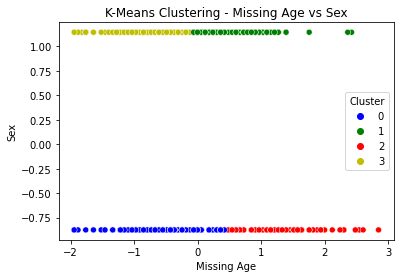

In [30]:
# Extract the necessary columns for clustering
features = missing_copy[['Missing Age', 'Sex']]

# Set the number of clusters
k = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(features)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame
missing_copy['Cluster'] = cluster_labels

# Define the colors for each cluster
colors = ['b', 'g', 'r', 'y']  # Adjust the colors as needed

# Create a scatter plot using Seaborn
sns.scatterplot(x='Missing Age', y='Sex', hue='Cluster', palette=colors, data=missing_copy)

# Set the labels for the x and y axes
plt.xlabel('Missing Age')
plt.ylabel('Sex')

# Set the title for the plot
plt.title('K-Means Clustering - Missing Age vs Sex')

# Show the plot
plt.show()

### Analysis
When comparing Missing Age and Sex there are distinct clusters within the data. Younger males and females fall into their own separate clusters, as well as older males and older females. The clusters are pretty evenly split. Less older women seem to go missing than older men, and there are also a few outliers in the red cluster at the female level. There are patterns within the data that help distinguish characteristics of cases based on Missing Age and Sex. The four groups with distiguishable characteristics include: young females, older females, young males, and older males.

# Question 4 
Are there any discernible patterns or clusters in the relationship between 'Race / Ethnicity' and 'Missing Age' variables?

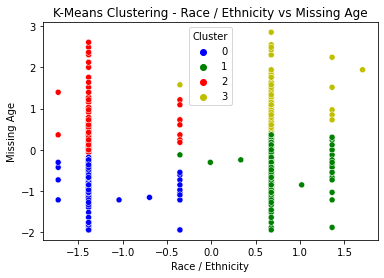

In [31]:
# Extract the necessary columns for clustering
features = missing_copy[['Race / Ethnicity', 'Missing Age']]

# Set the number of clusters
k = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(features)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame
missing_copy['Cluster'] = cluster_labels

# Define the colors for each cluster
colors = ['b', 'g', 'r', 'y']  # Adjust the colors as needed

# Create a scatter plot using Seaborn
sns.scatterplot(x='Race / Ethnicity', y='Missing Age', hue='Cluster', palette=colors, data=missing_copy)

# Set the labels for the x and y axes
plt.xlabel('Race / Ethnicity')
plt.ylabel('Missing Age')

# Set the title for the plot
plt.title('K-Means Clustering - Race / Ethnicity vs Missing Age')

# Show the plot
plt.show()

### Analysis
There are discernible patterns or clusters in the relationship between Race/Ethnicity and Missing Age variables. Older people and younger people are split, then within that split clusters form grouping certain races/ethnicities together. There are a few outliers in the different clusters of whom are of a race/ethnicity that is not widely represented in this dataset.